# <center>Challenge 2<center>

<p>Team Name: Banana
<p>Student Names: Kyle Tran, Cory Sandoz
<p>Student W#s: w0710503, w0714885


## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [22]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics


# PART I

## Prepare Data

Use the data set provided below, prepare data in a csv file <i>data.csv</i> and write your code to read data into an object. The first line of the file should have headers.

![image.png](attachment:image.png)

In [23]:
url = "data.csv"
df1 = pd.read_csv(url)
display(df1)

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Cool,Normal,Weak,Yes


<b>Implement part of the ID3 algorithm to generate a decision tree.</b><br>
Write a function <i>findChild(...)</i> which takes inputs of a data set, a parent (Attribute=Value), and an attribute to be checked as a child. The function prints calculations using the following format.<br>
Add comments for each section of your code such as "parent node statistics", "parent node entropy", "ith check of the parent", "ith check's condition", "child node statistics", "child node entropy", "children's average entropy", "information Gain", "best condition", etc.

In [24]:
cCandL = ('Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis')

def findChild(df1, parentAttr, parentAVal, childCandidate):
  df2 = df1.loc[df1[parentAttr] == parentAVal]
  dfPar = df1[parentAttr] == parentAVal
  dfYes = df2['PlayTennis'] == 'Yes'
  dfNo = df2['PlayTennis'] == 'No'
  numData = np.count_nonzero(dfPar, axis=0)
  #Number of rows with correct feature value
  print("numData: ", numData)
  #Number of data points for each class of positive and negative
  nPos = np.count_nonzero(dfYes, axis=0)
  nNeg = np.count_nonzero(dfNo, axis=0)
  print("nPos: ", nPos, ", nNeg: ", nNeg)
  #Entropy calculation
  if nPos == 0 or nNeg == 0:
      entropy = 0
  else:
      entropy = -(nPos/numData * math.log((nPos/numData),2) + nNeg/numData * math.log((nNeg/numData),2))

  #
  print('\nEntropy:\n', entropy)
  uniques = df2[childCandidate].unique()
  count = 1
  display(df2)
  WAElist = []
  ThePossibleChild = []
  for value in uniques:
    #Number of right (nonequal) data points and number of left (equal) data points
    #df3 is left and df4 is right
    df3 = df2.loc[df2[childCandidate] == value]
    ThePossibleChild.append(df3)
    df4 = df2.loc[df2[childCandidate] != value]
    print('Check -', count, ': (', childCandidate, '=', value, ')')
    count += 1
    print('numLeft: ', len(df3), 'numRight: ', len(df4))
    #Number of data points which can and cannot Play Tennis (Left)
    NumLeft = len(df3)
    dfLeftPos = df3['PlayTennis'] == 'Yes'
    dfLeftNeg = df3['PlayTennis'] == 'No'
    nLeftPos = np.count_nonzero(dfLeftPos, axis=0)
    nLeftNeg = np.count_nonzero(dfLeftNeg, axis=0)
    print('nLeftPos: ', nLeftPos, ',', 'nLeftNeg: ', nLeftNeg)
    #Number of data points which can and cannot Play Tennis (Right)
    NumRight = len(df4)
    dfRightPos = df4['PlayTennis'] == 'Yes'
    dfRightNeg = df4['PlayTennis'] == 'No'
    nRightPos = np.count_nonzero(dfRightPos, axis=0)
    nRightNeg = np.count_nonzero(dfRightNeg, axis=0)
    print('nRightPos: ', nRightPos, ',', 'nRightNeg: ', nRightNeg)
    #Entropy of Left/Right
    #Math domain error, probably neg log.; mess around with and check slides/google entropy equation
    #child node entropy of left and right
    if nLeftPos == 0 or nLeftNeg == 0:
      leftEntr = 0
    else:
      leftEntr = -(nLeftPos/NumLeft * math.log((nLeftPos/NumLeft),2) + nLeftNeg/NumLeft * math.log((nLeftNeg/NumLeft),2))
    if nRightPos == 0 or nRightNeg == 0:
      rightEntr = 0
    else:  
      rightEntr = -(nRightPos/NumRight * math.log((nRightPos/NumRight),2) + nRightNeg/NumRight * math.log((nRightNeg/NumRight),2))
   
    print('EntropyLeft:', leftEntr, 'EntropyRight: ', rightEntr)
   # child node wieght average
    WAE = (NumLeft/numData) * leftEntr + (NumRight/numData) * rightEntr 
    WAElist.append(WAE)
    print('WAE:', WAE)
    #info gain
    InfoGain = entropy - WAE
    print('information Gain:', InfoGain )
  #Best condition
  min_value = min(WAElist)
  min_index = WAElist.index(min_value)
  print( "Best condition ID", min_index,", condition: (",childCandidate," = ",uniques[min_index],")" )
  return ThePossibleChild[min_index]
findChild(df1, 'Outlook', 'Sunny', 'Temperature')


numData:  5
nPos:  2 , nNeg:  3

Entropy:
 0.9709505944546686


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes


Check - 1 : ( Temperature = Hot )
numLeft:  2 numRight:  3
nLeftPos:  0 , nLeftNeg:  2
nRightPos:  2 , nRightNeg:  1
EntropyLeft: 0 EntropyRight:  0.9182958340544896
WAE: 0.5509775004326937
information Gain: 0.4199730940219749
Check - 2 : ( Temperature = Mild )
numLeft:  2 numRight:  3
nLeftPos:  1 , nLeftNeg:  1
nRightPos:  1 , nRightNeg:  2
EntropyLeft: 1.0 EntropyRight:  0.9182958340544896
WAE: 0.9509775004326937
information Gain: 0.01997309402197489
Check - 3 : ( Temperature = Cool )
numLeft:  1 numRight:  4
nLeftPos:  1 , nLeftNeg:  0
nRightPos:  1 , nRightNeg:  3
EntropyLeft: 0 EntropyRight:  0.8112781244591328
WAE: 0.6490224995673063
information Gain: 0.3219280948873623
Best condition ID 0 , condition: ( Temperature  =  Hot )


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No


<b>Print calculations using the following format.</b><br>As an example, assume the parent is (A=a1) and the child attribute to be checked is B; assume the condition (B=b1) is to be checked at the ith check.<br>
PARENT (A=a1)<br>
>       numData:  .....                                               #Number of data points (feature vectors)
      nPos: ....., nNeg: .......                 #Number of data points for each class of positive and negative
      Entropy:
    Check-i: (B=b1)
      numLeft: ....., numRight: ..... #Number of data points at the left node (B=b1) and the right node (B != b1)
      nLeftPos: ....., nLeftNeg: .....                   #Number of data points for each class at the left node
      nRightPos: ....., nRightNeg: .....                #Number of data points for each class at the right node
      EntropyLeft: ....., EntropyRight: .....
      WAE: .....                                                                      #Weighted average entropy
      Information Gain: ..... 
    Best condition ID: ..., condition: (... = ...)                                           #(Attribute=Value)
        

## Test The Code

<b>Finding the first parent node.</b><br>
Start with the attribute "Wind" as the parent node. Calculate the parent node DT values.<br><br>
<b>Searching for a child node</b><br>
Consider attributes of "Outlook" and "Temperature"; determine which one would be the best as a child node.

In [25]:
uniques = df1['Wind'].unique()
listofWindchildoftemp = []
listofWindchildofOutlook = []
for values in uniques:
  listofWindchildoftemp.append(findChild(df1, 'Wind', values, 'Temperature'))
for values in uniques:
  listofWindchildofOutlook.append(findChild(df1, 'Wind', values, 'Outlook'))

numData:  8
nPos:  6 , nNeg:  2

Entropy:
 0.8112781244591328


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Cool,Normal,Weak,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes


Check - 1 : ( Temperature = Hot )
numLeft:  3 numRight:  5
nLeftPos:  2 , nLeftNeg:  1
nRightPos:  4 , nRightNeg:  1
EntropyLeft: 0.9182958340544896 EntropyRight:  0.7219280948873623
WAE: 0.7955659970750351
information Gain: 0.015712127384097774
Check - 2 : ( Temperature = Mild )
numLeft:  2 numRight:  6
nLeftPos:  1 , nLeftNeg:  1
nRightPos:  5 , nRightNeg:  1
EntropyLeft: 1.0 EntropyRight:  0.6500224216483541
WAE: 0.7375168162362655
information Gain: 0.0737613082228673
Check - 3 : ( Temperature = Cool )
numLeft:  3 numRight:  5
nLeftPos:  3 , nLeftNeg:  0
nRightPos:  3 , nRightNeg:  2
EntropyLeft: 0 EntropyRight:  0.9709505944546686
WAE: 0.6068441215341679
information Gain: 0.20443400292496494
Best condition ID 2 , condition: ( Temperature  =  Cool )
numData:  6
nPos:  3 , nNeg:  3

Entropy:
 1.0


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
1,D2,Sunny,Hot,High,Strong,No
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
13,D14,Rain,Mild,High,Strong,No


Check - 1 : ( Temperature = Hot )
numLeft:  1 numRight:  5
nLeftPos:  0 , nLeftNeg:  1
nRightPos:  3 , nRightNeg:  2
EntropyLeft: 0 EntropyRight:  0.9709505944546686
WAE: 0.8091254953788906
information Gain: 0.19087450462110944
Check - 2 : ( Temperature = Cool )
numLeft:  2 numRight:  4
nLeftPos:  1 , nLeftNeg:  1
nRightPos:  2 , nRightNeg:  2
EntropyLeft: 1.0 EntropyRight:  1.0
WAE: 1.0
information Gain: 0.0
Check - 3 : ( Temperature = Mild )
numLeft:  3 numRight:  3
nLeftPos:  2 , nLeftNeg:  1
nRightPos:  1 , nRightNeg:  2
EntropyLeft: 0.9182958340544896 EntropyRight:  0.9182958340544896
WAE: 0.9182958340544896
information Gain: 0.08170416594551044
Best condition ID 0 , condition: ( Temperature  =  Hot )
numData:  8
nPos:  6 , nNeg:  2

Entropy:
 0.8112781244591328


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Cool,Normal,Weak,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes


Check - 1 : ( Outlook = Sunny )
numLeft:  3 numRight:  5
nLeftPos:  1 , nLeftNeg:  2
nRightPos:  5 , nRightNeg:  0
EntropyLeft: 0.9182958340544896 EntropyRight:  0
WAE: 0.3443609377704336
information Gain: 0.46691718668869925
Check - 2 : ( Outlook = Overcast )
numLeft:  2 numRight:  6
nLeftPos:  2 , nLeftNeg:  0
nRightPos:  4 , nRightNeg:  2
EntropyLeft: 0 EntropyRight:  0.9182958340544896
WAE: 0.6887218755408672
information Gain: 0.12255624891826566
Check - 3 : ( Outlook = Rain )
numLeft:  3 numRight:  5
nLeftPos:  3 , nLeftNeg:  0
nRightPos:  3 , nRightNeg:  2
EntropyLeft: 0 EntropyRight:  0.9709505944546686
WAE: 0.6068441215341679
information Gain: 0.20443400292496494
Best condition ID 0 , condition: ( Outlook  =  Sunny )
numData:  6
nPos:  3 , nNeg:  3

Entropy:
 1.0


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
1,D2,Sunny,Hot,High,Strong,No
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
13,D14,Rain,Mild,High,Strong,No


Check - 1 : ( Outlook = Sunny )
numLeft:  2 numRight:  4
nLeftPos:  1 , nLeftNeg:  1
nRightPos:  2 , nRightNeg:  2
EntropyLeft: 1.0 EntropyRight:  1.0
WAE: 1.0
information Gain: 0.0
Check - 2 : ( Outlook = Rain )
numLeft:  2 numRight:  4
nLeftPos:  0 , nLeftNeg:  2
nRightPos:  3 , nRightNeg:  1
EntropyLeft: 0 EntropyRight:  0.8112781244591328
WAE: 0.5408520829727552
information Gain: 0.4591479170272448
Check - 3 : ( Outlook = Overcast )
numLeft:  2 numRight:  4
nLeftPos:  2 , nLeftNeg:  0
nRightPos:  1 , nRightNeg:  3
EntropyLeft: 0 EntropyRight:  0.8112781244591328
WAE: 0.5408520829727552
information Gain: 0.4591479170272448
Best condition ID 1 , condition: ( Outlook  =  Rain )


<b>Searching for a next child node.</b><br>
Consider "Outlook" and "Temperature"; determine which one would be the best as a child node.

In [26]:

countfortemp = 0
for child in listofWindchildoftemp:
  name = listofWindchildoftemp[countfortemp]['Temperature'].unique()
  findChild(listofWindchildoftemp[countfortemp],'Temperature',name[0],"Outlook")
  countfortemp =+ 1

countforOutlook = 0
for child in listofWindchildofOutlook:
  name = listofWindchildofOutlook[countforOutlook]['Outlook'].unique()
  findChild(listofWindchildofOutlook[countforOutlook],'Outlook',name[0],"Temperature")
  countforOutlook =+ 1  




numData:  3
nPos:  3 , nNeg:  0

Entropy:
 0


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
4,D5,Rain,Cool,Normal,Weak,Yes
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Cool,Normal,Weak,Yes


Check - 1 : ( Outlook = Rain )
numLeft:  2 numRight:  1
nLeftPos:  2 , nLeftNeg:  0
nRightPos:  1 , nRightNeg:  0
EntropyLeft: 0 EntropyRight:  0
WAE: 0.0
information Gain: 0.0
Check - 2 : ( Outlook = Sunny )
numLeft:  1 numRight:  2
nLeftPos:  1 , nLeftNeg:  0
nRightPos:  2 , nRightNeg:  0
EntropyLeft: 0 EntropyRight:  0
WAE: 0.0
information Gain: 0.0
Best condition ID 0 , condition: ( Outlook  =  Rain )
numData:  1
nPos:  0 , nNeg:  1

Entropy:
 0


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
1,D2,Sunny,Hot,High,Strong,No


Check - 1 : ( Outlook = Sunny )
numLeft:  1 numRight:  0
nLeftPos:  0 , nLeftNeg:  1
nRightPos:  0 , nRightNeg:  0
EntropyLeft: 0 EntropyRight:  0
WAE: 0.0
information Gain: 0.0
Best condition ID 0 , condition: ( Outlook  =  Sunny )
numData:  3
nPos:  1 , nNeg:  2

Entropy:
 0.9182958340544896


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes


Check - 1 : ( Temperature = Hot )
numLeft:  1 numRight:  2
nLeftPos:  0 , nLeftNeg:  1
nRightPos:  1 , nRightNeg:  1
EntropyLeft: 0 EntropyRight:  1.0
WAE: 0.6666666666666666
information Gain: 0.2516291673878229
Check - 2 : ( Temperature = Mild )
numLeft:  1 numRight:  2
nLeftPos:  0 , nLeftNeg:  1
nRightPos:  1 , nRightNeg:  1
EntropyLeft: 0 EntropyRight:  1.0
WAE: 0.6666666666666666
information Gain: 0.2516291673878229
Check - 3 : ( Temperature = Cool )
numLeft:  1 numRight:  2
nLeftPos:  1 , nLeftNeg:  0
nRightPos:  0 , nRightNeg:  2
EntropyLeft: 0 EntropyRight:  0
WAE: 0.0
information Gain: 0.9182958340544896
Best condition ID 2 , condition: ( Temperature  =  Cool )
numData:  2
nPos:  0 , nNeg:  2

Entropy:
 0


,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
5,D6,Rain,Cool,Normal,Strong,No
13,D14,Rain,Mild,High,Strong,No


Check - 1 : ( Temperature = Cool )
numLeft:  1 numRight:  1
nLeftPos:  0 , nLeftNeg:  1
nRightPos:  0 , nRightNeg:  1
EntropyLeft: 0 EntropyRight:  0
WAE: 0.0
information Gain: 0.0
Check - 2 : ( Temperature = Mild )
numLeft:  1 numRight:  1
nLeftPos:  0 , nLeftNeg:  1
nRightPos:  0 , nRightNeg:  1
EntropyLeft: 0 EntropyRight:  0
WAE: 0.0
information Gain: 0.0
Best condition ID 0 , condition: ( Temperature  =  Cool )


# PART II

<b>Generate a decision tree by means of a Python library</b>
- Use 70% of the data for training and 30% for testing.
- Compare performance of the model based on “gini” and “entropy” measures. As a performance measure use sensitivity, specificity, AUC, and F1-score
- Plot performance measures on a single figure for “gini” and “entropy”. Group by performance measures.

In [27]:
dfwithvalue = df1.drop('PlayTennis',axis=1).copy()
dfwithvalue = dfwithvalue.drop('Day',axis=1).copy()
display(dfwithvalue)
print(dfwithvalue.dtypes)
dfwithtarget = df1["PlayTennis"]
dfwithtarget.columns = ["PlayTennis"]
dfwithtarget = pd.DataFrame(dfwithtarget)
display(dfwithtarget)
dfwithtarget = dfwithtarget.replace('Yes', 1)
dfwithtarget = dfwithtarget.replace('No', 0)

dfwithtarget = dfwithtarget.astype("int")
display(dfwithtarget)

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Cool,Normal,Weak


Outlook        object
Temperature    object
Humidity       object
Wind           object
dtype: object


,PlayTennis
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


,PlayTennis
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


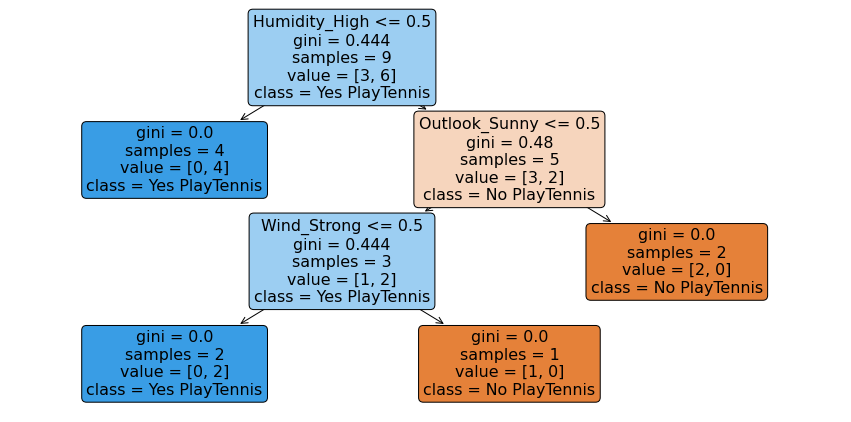

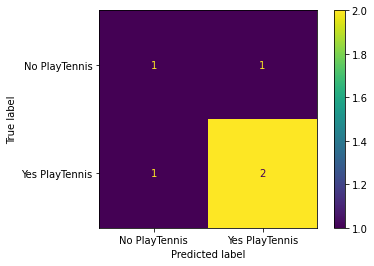

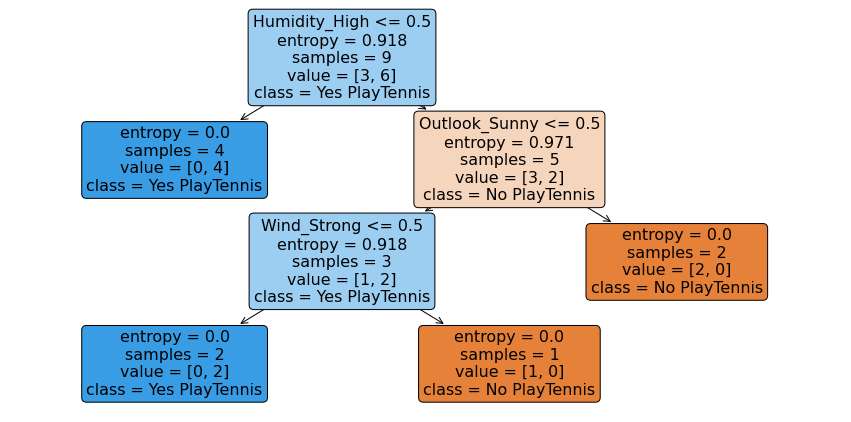

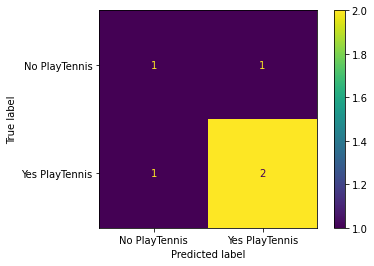

In [28]:
dfwithvalueadj = pd.get_dummies(dfwithvalue, columns = ["Outlook","Temperature","Humidity","Wind"])



x_train, x_test, y_train, y_test = train_test_split(dfwithvalueadj,dfwithtarget,test_size = .3,random_state = 42)

treegini = DecisionTreeClassifier(random_state = 42)
treegini = treegini.fit(x_train, y_train)
treeginipred = treegini.predict(x_test)
tngini, fpgini, fngini, tpgini = confusion_matrix(y_test,treeginipred).ravel()
sensitivitygini = tngini/(tngini + fpgini)
specificitygini = tpgini/(tpgini + fngini)
f1gini = tpgini/(tpgini + .5 *( fpgini + fngini))
fprgini, tprgini, thresholds = metrics.roc_curve(y_test, treeginipred)
aucgini = metrics.auc(fprgini, tprgini)


plt.figure(figsize = (15, 7.5))
plot_tree(treegini,filled = True,rounded = True, class_names = ["No PlayTennis","Yes PlayTennis"],feature_names=dfwithvalueadj.columns)
plot_confusion_matrix(treegini,x_test,y_test,display_labels = ["No PlayTennis","Yes PlayTennis"])

treeentropy = DecisionTreeClassifier(criterion = "entropy",random_state = 42)
treeentropy = treeentropy.fit(x_train, y_train)
treeentropypred = treeentropy.predict(x_test)
tnentropy, fpentropy, fnentropy, tpentropy = confusion_matrix(y_test,treeentropypred).ravel()
sensitivityentropy = tnentropy/(tnentropy + fpentropy)
specificityentropy = tpentropy/(tpentropy + fnentropy)
f1entropy = tpentropy/(tpentropy + .5 *( fpentropy + fnentropy))
fprentropy, tprentropy, thresholds = metrics.roc_curve(y_test, treeentropypred)
aucentropy = metrics.auc(fprentropy, tprentropy)

plt.figure(figsize = (15, 7.5))
plot_tree(treeentropy,filled = True,rounded = True, class_names = ["No PlayTennis","Yes PlayTennis"],feature_names=dfwithvalueadj.columns)
plot_confusion_matrix(treeentropy,x_test,y_test,display_labels = ["No PlayTennis","Yes PlayTennis"])

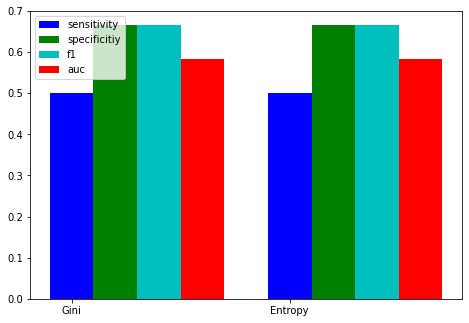

In [29]:
X = ['Gini', 'Entropy']
Performance = ["sensitivity","specificitiy","f1",'auc']
sensitivity = [sensitivitygini,sensitivityentropy]
specificity = [specificitygini,specificityentropy]
f1 = [f1gini,f1entropy]
auc = [aucgini,aucentropy]
X_axis = np.arange(len(X))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis + 0.0, sensitivity,  0.2,color = 'b', label = "sensitivity" )
ax.bar(X_axis + 0.2, specificity,  0.2,color = 'g', label = "specificity" )
ax.bar(X_axis + 0.4, f1,  0.2,color = 'c', label = "f1")
ax.bar(X_axis + 0.6, auc, 0.2, color = 'r', label = "auc" )

plt.xticks(X_axis, X)
plt.legend(Performance)


## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.